In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [560]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X, y)
#Hint: .fit()

LinearRegression()

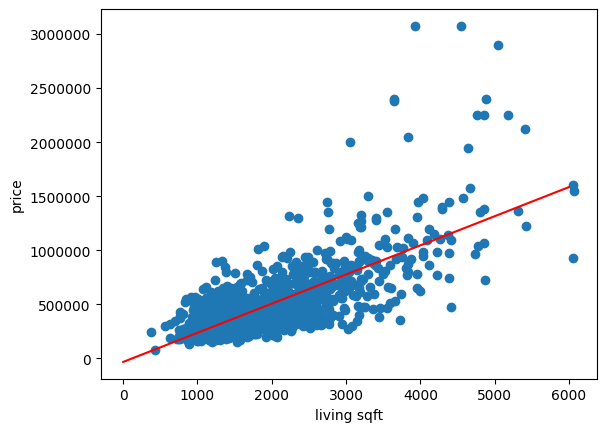

In [561]:
#b) Evaluate and visualise created model.

plt.scatter(X, y)
x_model = np.linspace(0, 6000, 1000)
y_model = [model.intercept_ + model.coef_ * x for x in x_model]
plt.ticklabel_format(style='plain') # turn off scientific notation
plt.plot(x_model, y_model, color="red")
plt.xlabel("living sqft")
plt.ylabel("price")
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

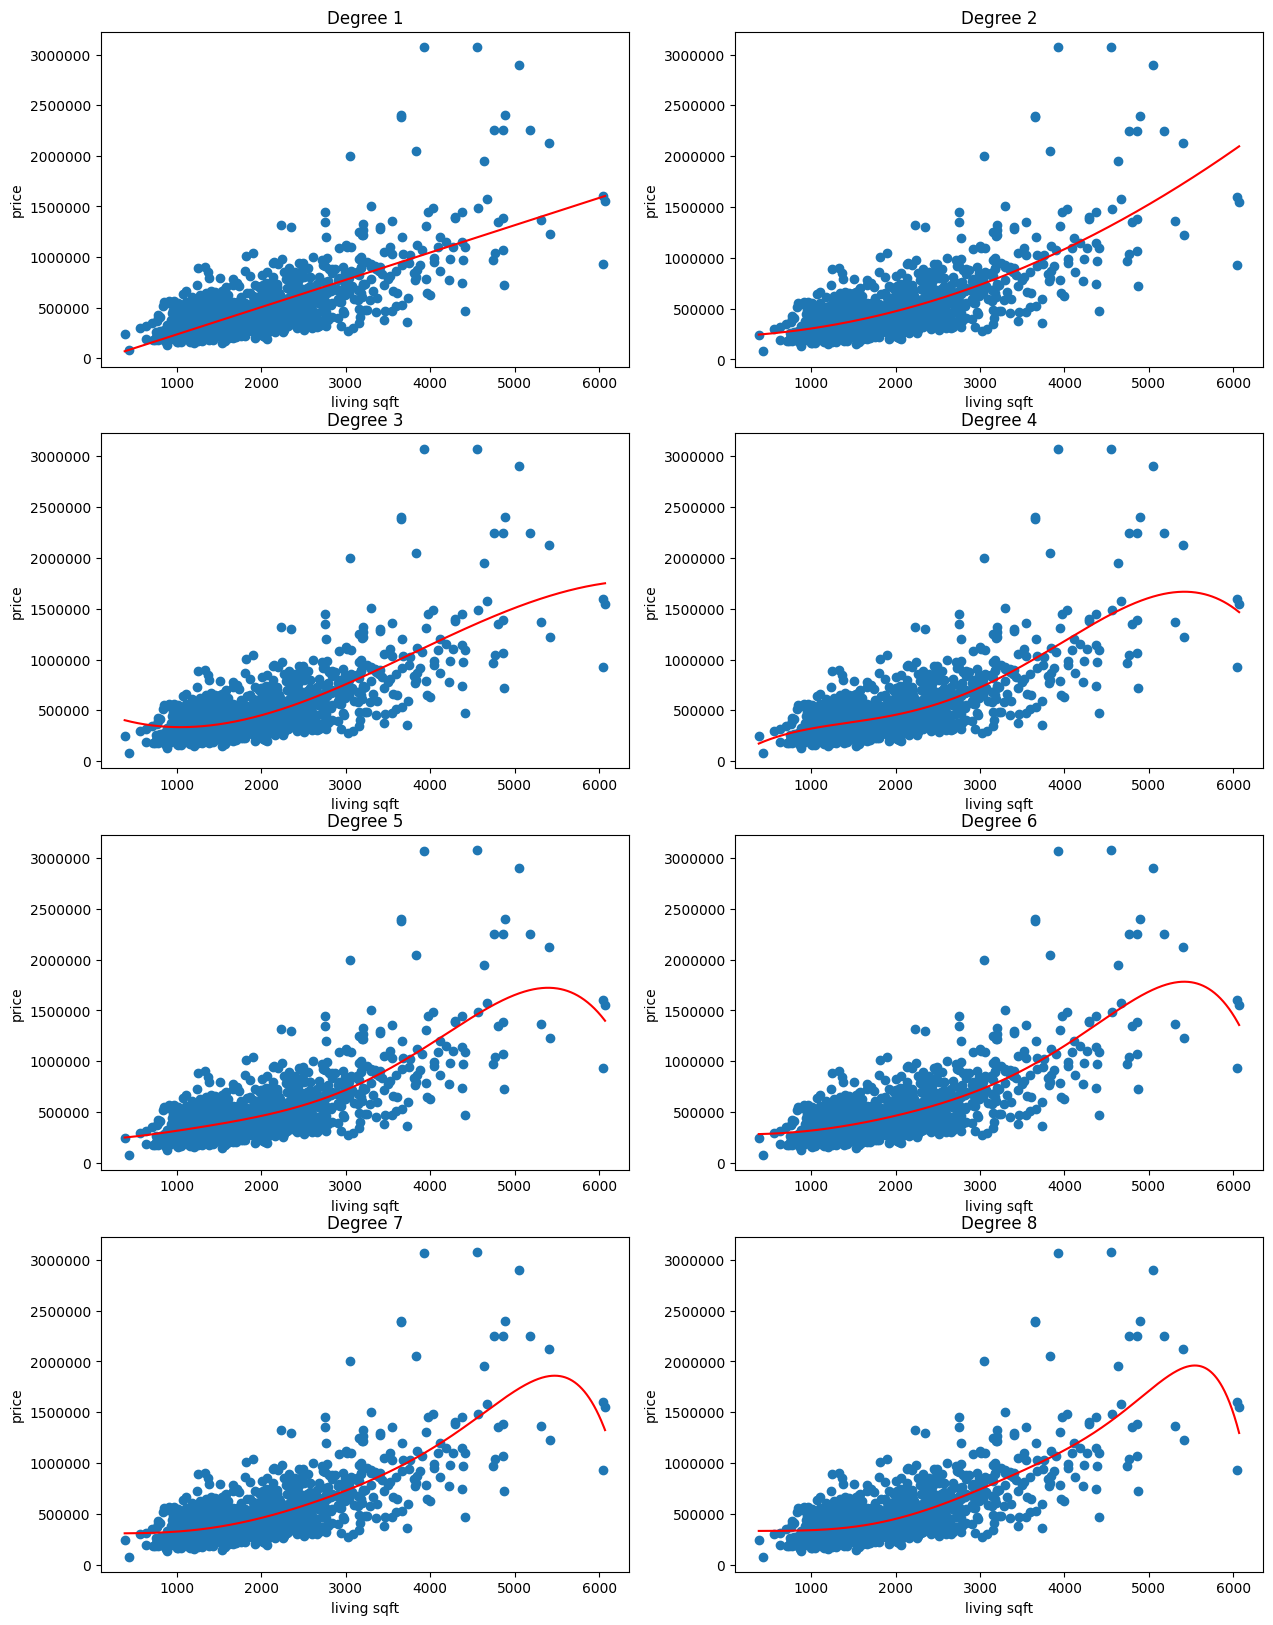

In [562]:
#c) Create and plot higher order polynomial regression models.

plt.figure(figsize=(15, 20))

error = []
for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    new_model = LinearRegression() # define model
    new_model.fit(X_order, y)

    x_new_model = np.linspace(np.min(X), np.max(X), 1000).reshape(-1, 1)
    # y_model = [new_model.intercept_ + np.dot(new_model.coef_, np.power(x, range(1, order+1))) for x in x_model] # same as next two lines
    x_model_transformed = poly.fit_transform(x_new_model)
    y_model = new_model.predict(x_model_transformed)
    error.append(mean_squared_error(y, new_model.predict(X_order)))

    plt.subplot(4, 2, order)
    plt.ticklabel_format(style='plain') # turn off scientific notation
    plt.title("Degree " + str(order))
    plt.xlabel("living sqft")
    plt.ylabel("price")
    plt.plot(x_new_model, y_model,  color="red")
    plt.scatter(X, y)

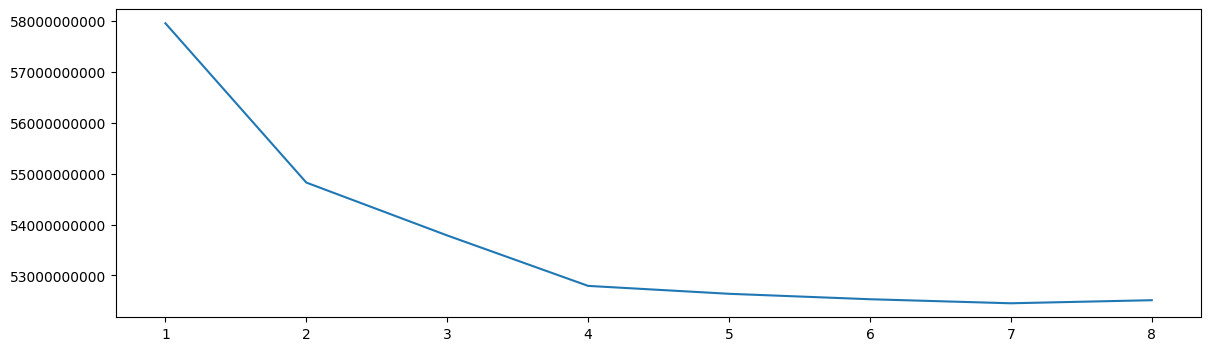

In [563]:
#Your code:
plt.figure(figsize=(14, 4))
plt.ticklabel_format(style='plain') # turn off scientific notation
x_range = np.linspace(1, 8, 8)
plt.plot(x_range, error)
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

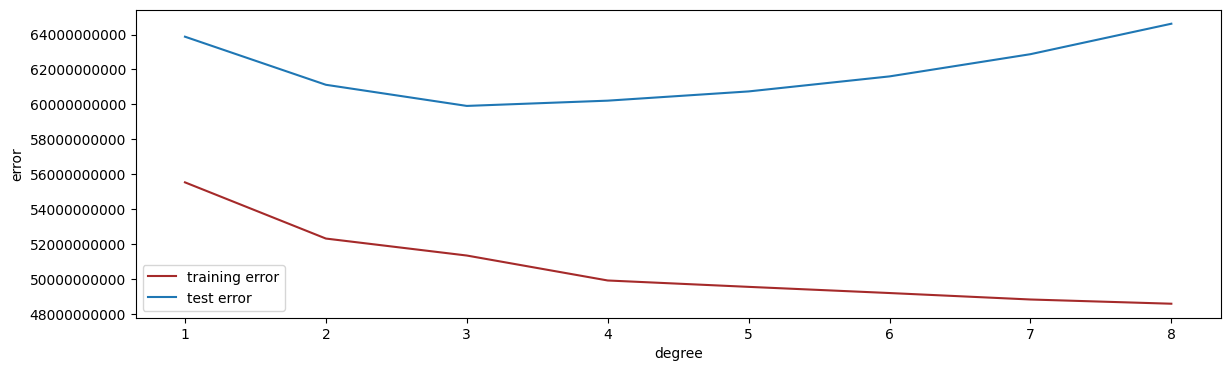

In [564]:
#a)

"""
In this exercise we are checking error that our models with different degree produce while predicting unknown data.
I used 70% data for training and 30% data for testing.

As we can observe: the higher degree in training gets, the better predictions we get.
This is not the case in unknown data. It is probably caused because of the fact, that the higher degree the polynomial has,
the more it tries to exactly match training data and becomes less precise at some point. 
"""
training_error = []
test_error = []

for order in range(1,9):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)
    
    model = LinearRegression() # define model
    poly = PolynomialFeatures(order, include_bias = False)
    X_order_train = poly.fit_transform(X_train)
    model.fit(X_order_train, y_train)
    training_error.append(mean_squared_error(y_train, model.predict(X_order_train)))
    X_order_test = poly.transform(X_test)
    test_error.append(mean_squared_error(y_test, model.predict(X_order_test)))


plt.figure(figsize=(14, 4))
x_range = np.linspace(1, 8, 8)
plt.plot(x_range, training_error, color="brown", label="training error")
plt.plot(x_range, test_error, label="test error")
plt.xlabel("degree")
plt.ylabel("error")
plt.ticklabel_format(style='plain') # turn off scientific notation
plt.legend()
plt.show()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

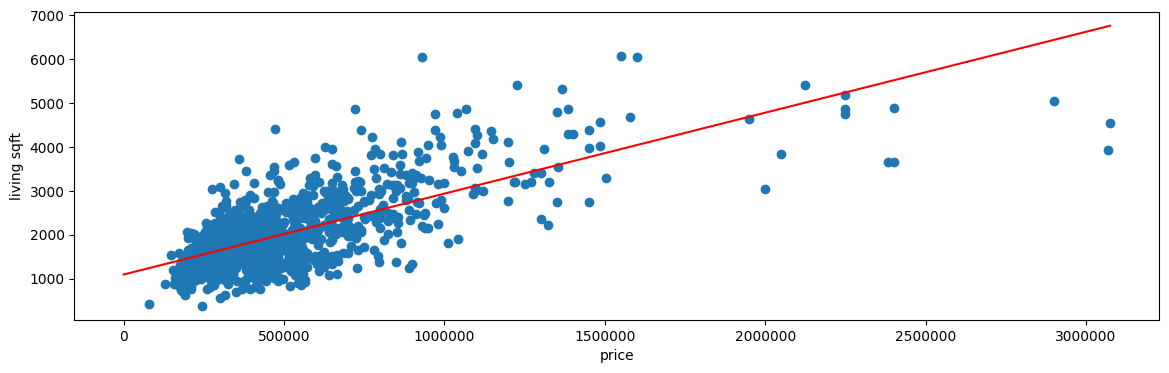

In [565]:
#a)
"""

In this exercise I trained a model using linear regression to predict square foot living for given house price.

This is not the best prediction as we can see, especially near the higher prices.
Usually when the price gets bigger, not only the square foot living gets higher,
but also the standard of the house gets better.
We can observe that predicted square foot living is way bigger than the real size on the right side of the plot.

"""
X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X, y)
x_range = np.linspace(0, np.max(X), 1000).reshape(-1, 1)
y_model = model.predict(x_range)

plt.figure(figsize=(14, 4))
plt.xlabel("price")
plt.ylabel("living sqft")
plt.ticklabel_format(style='plain') # turn off scientific notation
plt.plot(x_range, y_model, color="red")
plt.scatter(X, y)
plt.show()


In [566]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))

proposed_error = mean_squared_error(y_pred, y_test)


#Your model:

Mean squared error equals: 48749206568.562126


In [567]:
"""

Firstly let's answer ourselves, what has the biggest impact on houses price?

In my opinion, it is:
- square foot living
- condition
- grade
- year built
- year renovated
- view

That is why I propose model based on these factors.

I prepared my program to count errors for every reasonable factorial and choose the tiniest minimum squared error.

I also tried different combinations and they were close to my proposed model, but I did not get any better and meaningful result.
"""

all_my_errors = []
for feature_level in range(1, 7): # counting higher features takes a lot of time
    X = house_df[['sqft_living', 'condition', 'grade', 'yr_built', 'view', 'yr_renovated']].values.reshape(-1, 6)
    y = house_df.price.values.reshape(-1)
    
    poly = PolynomialFeatures(feature_level, include_bias = False)
    X = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    my_error = mean_squared_error(y_pred, y_test)
    print("Mean squared error for feature: " + str(feature_level) + " level equals: {0}".format(my_error))
    all_my_errors.append(my_error)
    
    if my_error >= proposed_error:
        print("My MSE with feature: " + str(feature_level) + " is worse than proposed model")
    else:
        print("My MSE with feature: " + str(feature_level) + " is ___BETTER___ than proposed model!")
    print("\n\n")

print("\n\nSmallest mean squared error is: " + str(min(all_my_errors)) + " and it's feature level is: " + str(all_my_errors.index(min(all_my_errors))+1))


Mean squared error for feature: 1 level equals: 52077114455.44455
My MSE with feature: 1 is worse than proposed model


Mean squared error for feature: 2 level equals: 42712743983.35078
My MSE with feature: 2 is ___BETTER___ than proposed model!


Mean squared error for feature: 3 level equals: 40504380712.45032
My MSE with feature: 3 is ___BETTER___ than proposed model!


Mean squared error for feature: 4 level equals: 46799093876.38136
My MSE with feature: 4 is ___BETTER___ than proposed model!


Mean squared error for feature: 5 level equals: 11588537603856.914
My MSE with feature: 5 is worse than proposed model


Mean squared error for feature: 6 level equals: 464547758621999.75
My MSE with feature: 6 is worse than proposed model





Smallest mean squared error is: 40504380712.45032 and it's feature level is: 3


In [568]:
"""

Thanks to this solutions I can observe, that the best model is based on factors I proposed earlier and has feature level 3.

I even noticed that when we change random sampling of training/test data
we can get minimum squared error below 4*10^10 :)


(we can get the above by changing 'random_state' to '4')

"""
pass